# BITCOIN PRICE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

from arch import arch_model
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import norm
from datetime import datetime


# EDA

In [2]:
btc = pd.read_excel("BTCUSD_2015_2025.xlsx", sheet_name="Data")
btc

,Date,Close
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
3767,2025-04-25,94720.500000
3768,2025-04-26,94646.929688
3769,2025-04-27,93754.843750
3770,2025-04-28,94978.750000


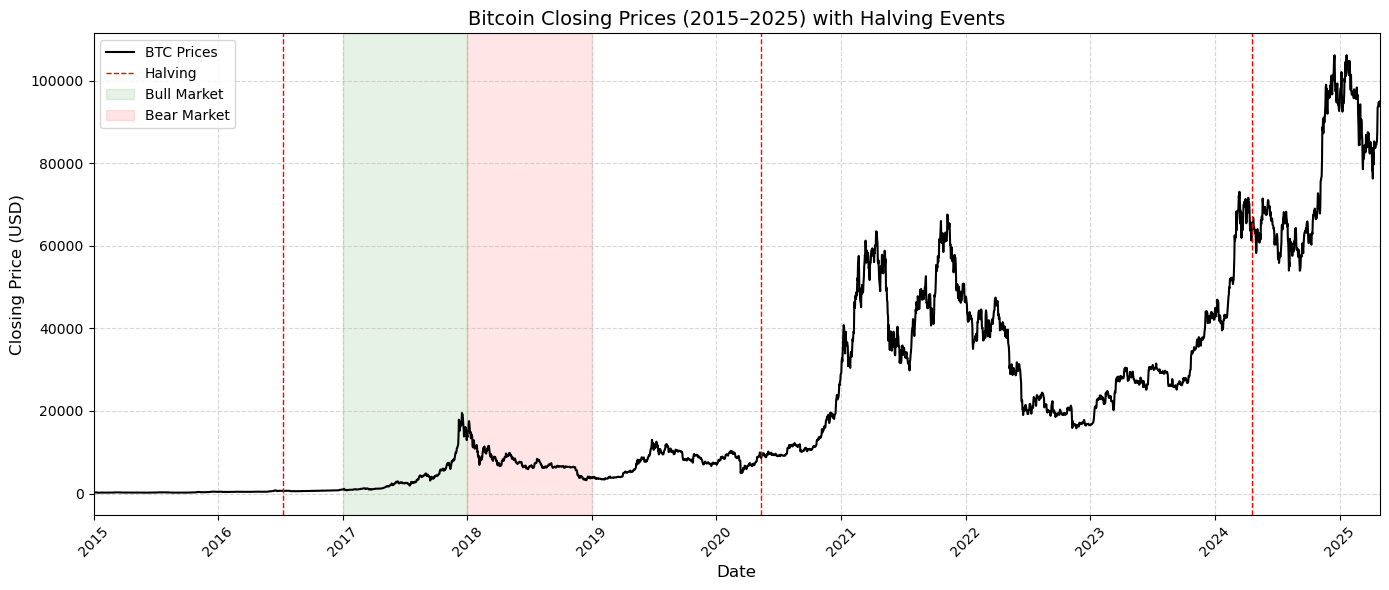

In [3]:
btc = pd.read_excel("BTCUSD_2015_2025.xlsx", sheet_name="Data", parse_dates=['Date'], index_col='Date')

plt.figure(figsize=(14, 6))
plt.plot(btc['Close'], label="BTC Prices", color='black', linewidth=1.5)
plt.xlim(pd.to_datetime("2015-01-01"), pd.to_datetime("2025-04-29"))

halving_dates = ["2016-07-09", "2020-05-11", "2024-04-19"]
for date in halving_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1, label='Halving' if date == halving_dates[0] else None)

plt.axvspan(pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-31"), color='green', alpha=0.1, label='Bull Market')
plt.axvspan(pd.to_datetime("2018-01-01"), pd.to_datetime("2018-12-31"), color='red', alpha=0.1, label='Bear Market')

# Labels and formatting
plt.title("Bitcoin Closing Prices (2015–2025) with Halving Events", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [4]:
btc['Log_return'] = np.log(btc['Close'] / btc['Close'].shift(1))
btc

,Close,Log_return
Date,,
2015-01-01,314.248993,NaN
2015-01-02,315.032013,0.002489
2015-01-03,281.082001,-0.114028
2015-01-04,264.195007,-0.061959
2015-01-05,274.473999,0.038169
...,...,...
2025-04-25,94720.500000,0.008234
2025-04-26,94646.929688,-0.000777
2025-04-27,93754.843750,-0.009470


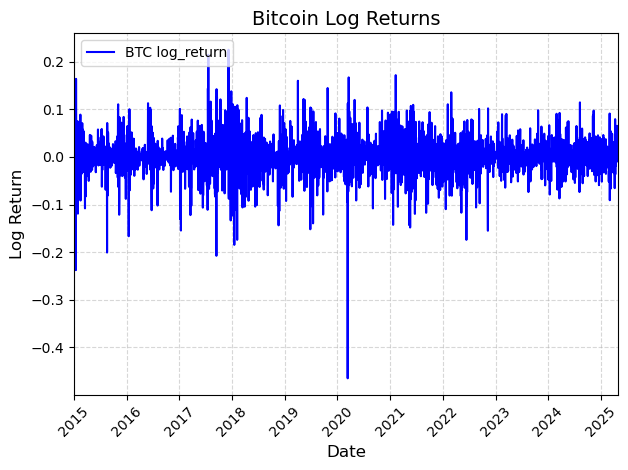

In [5]:
plt.plot(btc['Log_return'], label="BTC log_return", c='blue', lw=1.5)
plt.xlim(pd.to_datetime("2015-01-01"), pd.to_datetime("2025-04-29"))

plt.title("Bitcoin Log Returns", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Return", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [6]:
btc.head()

,Close,Log_return
Date,,
2015-01-01,314.248993,NaN
2015-01-02,315.032013,0.002489
2015-01-03,281.082001,-0.114028
2015-01-04,264.195007,-0.061959
2015-01-05,274.473999,0.038169


In [7]:
DF_test = sm.tsa.stattools.adfuller(btc['Close'], regression='ct', autolag='BIC', store=False, regresults=True)
DF_test

(-1.4464901932858616,
 0.846744324141091,
 {'1%': -3.9611733554436377,
  '5%': -3.4116551989414927,
  '10%': -3.1277361121190146},
 <statsmodels.stats.diagnostic.ResultsStore at 0x153ac2f30>)

In [8]:
sm.tsa.stattools.adfuller(btc['Log_return'].dropna(), regression='c', autolag='BIC', store=False, regresults=True)

(-63.04414287426964,
 0.0,
 {'1%': -3.4320857448564164,
  '5%': -2.862306956470579,
  '10%': -2.567178261297835},
 <statsmodels.stats.diagnostic.ResultsStore at 0x153a318e0>)

In [9]:
returns = btc['Log_return'].dropna()  

start_date_in = '2015-01-01'
end_date_in ='2024-11-05' 

returns_in = returns.loc[start_date_in:end_date_in]
returns_out = returns.loc[end_date_in:]

In [10]:
# Jarque-Bera tests from statsmodels

jb_in = sm.stats.stattools.jarque_bera(returns_in, axis=0)
print(jb_in[0])
print(jb_in[1])
print(jb_in[2]) #Skewness
print(jb_in[3]) #Kurtosis

20483.581956072678
0.0
-0.7610086406526819
14.592781178357743


In [11]:
#===========================================================================
# ARCH tests on squared return (or using Multiplier Larange (more accurate))
#===========================================================================
returns_in_sq = returns_in**2

n_autocor = 5
sm.stats.diagnostic.acorr_ljungbox(returns_in_sq, lags=[n_autocor])

,lb_stat,lb_pvalue
5,105.212614,4.203540e-21


# STATS MODELS 

Iteration:      1,   Func. Count:      7,   Neg. LLF: 141567.97508071302
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1365106.7016202263
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7556.873939121904
            Iterations: 2
            Function evaluations: 30
            Gradient evaluations: 2
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                7556.87
Distribution:      Standardized Student's t   AIC:                          -15103.7
Method:                  Maximum Likelihood   BIC:                          -15072.8
                                              No. Observations:                 3596
Date:                      Tue, Jun 03 2025   Df Re

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001342. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


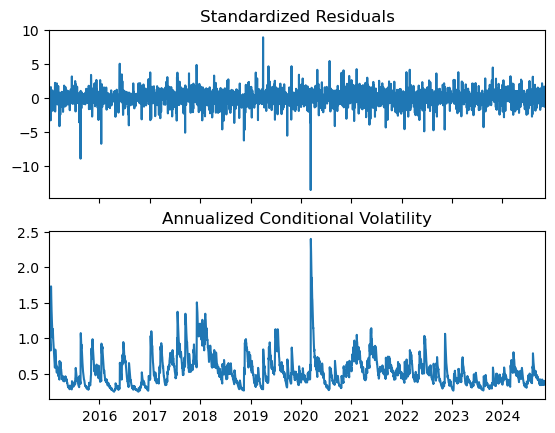

In [12]:
#===========================================================================
# GARCH(1,1)-t estimates vs. GJR-GARCH(1,1)
#===========================================================================

# GARCH(1,1)
garch_res = arch_model(returns_in, p=1, o=0, q=1, dist='t').fit()
print(garch_res.summary())
fig = garch_res.plot(annualize='D')

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001342. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 61590.672730848564
Iteration:      2,   Func. Count:     24,   Neg. LLF: -7485.8305386195625
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7485.830539156263
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                7485.83
Distribution:      Standardized Student's t   AIC:                          -14959.7
Method:                  Maximum Likelihood   BIC:                          -14922.5
                                              No. Observations:                 3596
Date:                      Tue, Jun 03 2025   Df R

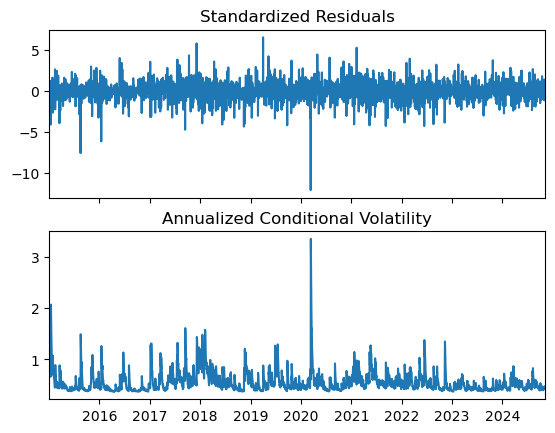

In [13]:
# GJR-GARCH(1,1)
gjr_res = arch_model(returns_in, p=1, o=1, q=1, dist='t').fit()
print(gjr_res.summary())
fig = gjr_res.plot(annualize='D')

In [14]:
# LR test
LR_stat = -2*(garch_res.loglikelihood - gjr_res.loglikelihood)
if LR_stat > chi2.ppf(0.99,1):
    print('Rejet H0')
else:
    print('Non Rejet H0')
    
# Not reject H0, we prefer constraint model, i.e GARCH

Non Rejet H0


Iteration:      1,   Func. Count:      8,   Neg. LLF: 43838.86362556279
Iteration:      2,   Func. Count:     21,   Neg. LLF: -7557.594964999543
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7557.594965503298
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 2
                              AR - GARCH Model Results                              
Dep. Variable:                   Log_return   R-squared:                       0.001
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                7557.59
Distribution:      Standardized Student's t   AIC:                          -15103.2
Method:                  Maximum Likelihood   BIC:                          -15066.1
                                              No. Observations:                 3595
Date:                      Tue, Jun 03 2025   Df Res

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001342. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


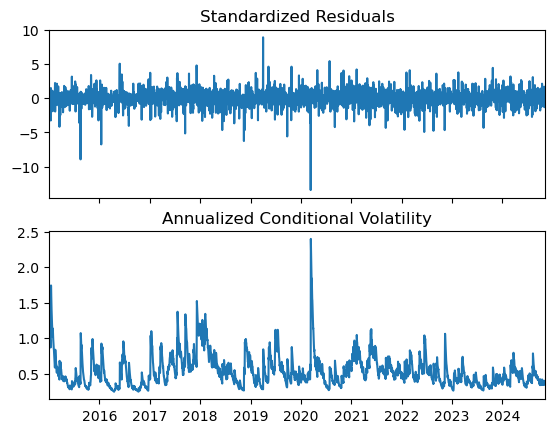

In [15]:
# AR-GARCH
ar_garch_res = arch_model(returns_in, mean='AR', lags=1, p=1, o=0, q=1, dist='t').fit()
print(ar_garch_res.summary())
fig = ar_garch_res.plot(annualize='D')

In [16]:
LR_stat = -2*(garch_res.loglikelihood - ar_garch_res.loglikelihood)
if LR_stat > chi2.ppf(0.90,2):
    print('Rejet H0')
else:
    print('Non Rejet H0')

# Not reject H0 means the constraint model garch is enough

Non Rejet H0


In [17]:
#===========================================================================
# Ljung-Box test on standardized residuals (validation step)
#===========================================================================

n_autocor = 40
sm.stats.diagnostic.acorr_ljungbox(garch_res.resid/garch_res.conditional_volatility, lags=[n_autocor])


,lb_stat,lb_pvalue
40,55.773092,0.049865


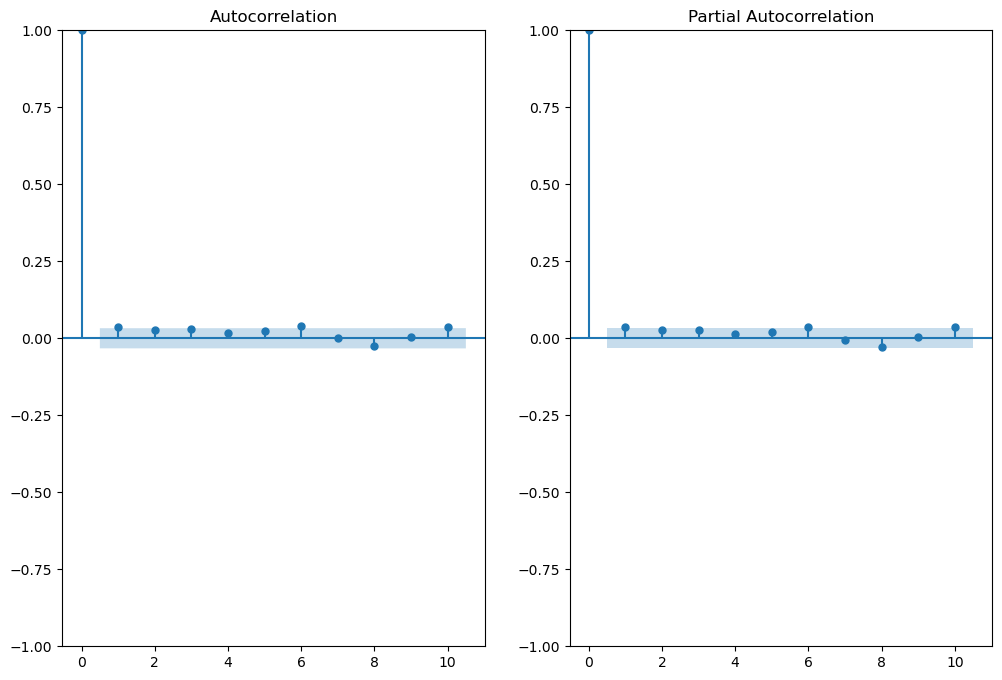

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(garch_res.resid/garch_res.conditional_volatility, lags=10, ax=ax1, alpha=0.05)
ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_pacf(garch_res.resid/garch_res.conditional_volatility, lags=10, ax=ax2, alpha=0.05)

# FORCASTING

Iteration:      1,   Func. Count:      7,   Neg. LLF: 144103.35397105568
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2126085.64378646
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7554.584273561606
            Iterations: 2
            Function evaluations: 30
            Gradient evaluations: 2


/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001343. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Axes: xlabel='Date'>

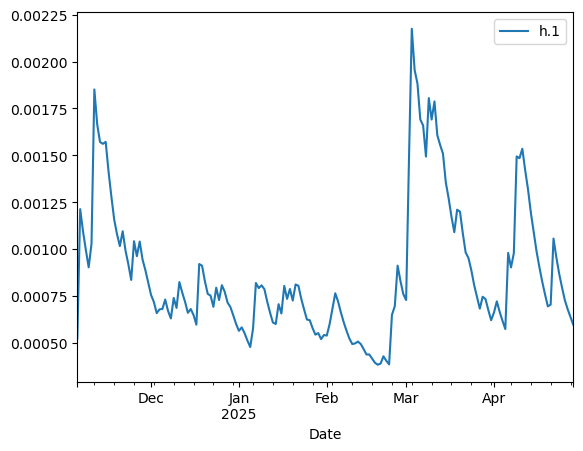

In [19]:
#===========================================================================
# Forecast
#===========================================================================

import datetime as dt
start = dt.datetime(2015,1,1)
end = dt.datetime(2025,4,29)
am = arch_model(returns, p=1, o=0, q=1, dist='t')

split_date = dt.datetime(2024,11,5)
res = am.fit(last_obs=split_date)

forecasts = res.forecast(horizon=1, start=split_date, reindex=True)
forecasts.variance[split_date:].plot()

In [20]:
res.params[0]

/var/folders/4m/44lhvkwx4nvgyd60ttsx1vk00000gn/T/ipykernel_7109/1386208526.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res.params[0]


0.0014748235814021817

/var/folders/4m/44lhvkwx4nvgyd60ttsx1vk00000gn/T/ipykernel_7109/3090428214.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  VaR_forecast = res.params[0] + np.sqrt(forecasts.variance[split_date:]) * t.ppf(alpha,res.params[-1])


0.011363636363636364


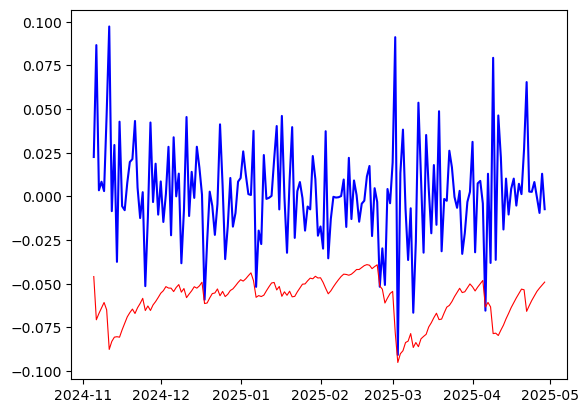

In [21]:
alpha = 0.05
VaR_forecast = res.params[0] + np.sqrt(forecasts.variance[split_date:]) * t.ppf(alpha,res.params[-1])

plt.plot(returns_out, 'b', label='Log-Returns', markersize=0.6)
plt.plot(VaR_forecast, 'r', label='VaR std',linewidth=0.8)

print(np.mean(returns_out < VaR_forecast['h.1'])) 

# BACKTESTING

In [22]:
# Construct the series of exceptions, denoted I (an exception occurs when the return is below the VaR)
I = (returns_out < VaR_forecast['h.1'])

# Count the number of exceptions (also called violations, breaches, or hits), noted as n_1
n_1 = sum(I == 1)
print(n_1)

# Count the number of non-exceptions (= 0) in the series I, noted as n_0
n_0 = sum(I == 0)

# Count the total number of observations in I, noted as deno (verify that n_0 + n_1 = T)
deno = n_0 + n_1

2


In [23]:
""" Unconditional Coverage Test (Kupiec Test) """
p = 0.05  # Theoretical probability level (e.g., 5% VaR)

# Likelihood under the null hypothesis (H0) for unconditional coverage
# Denoted as L_uc_H0, given by equation (1) where p = alpha
L_uc_H0 = (1 - p) ** n_0 * (p) ** n_1

# Likelihood under the alternative hypothesis (H1)
# Let pi_hat_uc be the maximum likelihood estimator of the empirical exception rate
pi_hat_uc = n_1 / float(len(returns_out))

# Likelihood under H1, denoted as L_uc_H1, given by equation (2)
L_uc_H1 = (1 - pi_hat_uc) ** n_0 * (pi_hat_uc) ** n_1

# Likelihood Ratio (LR) statistic for the unconditional coverage test
# Denoted as LR_uc, given by equation (3)
LR_uc = -2 * np.log(L_uc_H0 / L_uc_H1)
print("LR_uc statistic:", LR_uc)

# Compute the associated p-value under chi-squared distribution with 1 degree of freedom
Pvalue_uc = 1 - chi2.cdf(LR_uc, 1)
print("P-value (Unconditional Coverage):", Pvalue_uc)

LR_uc statistic: 7.946462136550025
P-value (Unconditional Coverage): 0.004818147435064701


In [24]:
""" Independence Test (Christoffersen Test) """

# From I_lead, take observations from index 1 to T
I_lead = I[1:]
# From I_lag, take observations from index 0 to T-1
I_lag = I[0:len(I) - 1]

# Initialize the transition counters
n_11 = 0  # Transition: exception → exception
n_10 = 0  # Transition: exception → no exception
n_00 = 0  # Transition: no exception → no exception
n_01 = 0  # Transition: no exception → exception

# Loop through the series to count transitions
for i in range(len(I_lead)):
    if I_lag.iloc[i] == 1 and I_lead.iloc[i] == 1:
        n_11 += 1
    if I_lag.iloc[i] == 1 and I_lead.iloc[i] == 0:
        n_10 += 1
    if I_lag.iloc[i] == 0 and I_lead.iloc[i] == 0:
        n_00 += 1
    if I_lag.iloc[i] == 0 and I_lead.iloc[i] == 1:
        n_01 += 1

# Verify that all transitions add up to the correct number of observations
print("Length of I_lead:", len(I_lead))
print("Sum of transitions:", n_11 + n_10 + n_00 + n_01)

# Likelihood under the null hypothesis (H0: independence)
# Let pi_hat_ind be the MLE of the unconditional probability of exception
pi_hat_ind = (n_01 + n_11) / (n_00 + n_01 + n_10 + n_11)
# Likelihood under H0, given by equation (4)
L_ind_H0 = ((1 - pi_hat_ind) ** (n_00 + n_10)) * (pi_hat_ind ** (n_01 + n_11))

# Likelihood under the alternative hypothesis (H1: first-order Markov dependence)
# pi_hat_01: prob of exception given no exception
pi_hat_01 = n_01 / (n_00 + n_01)
# pi_hat_11: prob of exception given exception
pi_hat_11 = n_11 / (n_10 + n_11)
# Likelihood under H1, given by equation (5)
L_ind_H1 = ((1 - pi_hat_01) ** n_00) * (pi_hat_01 ** n_01) * \
           ((1 - pi_hat_11) ** n_10) * (pi_hat_11 ** n_11)

# Likelihood Ratio (LR) for the independence test
# Given by equation (6)
LR_ind = -2 * np.log(L_ind_H0 / L_ind_H1)
print("LR_ind statistic:", LR_ind)

# Compute the p-value (1 - CDF of chi-squared with 1 degree of freedom)
Pvalue_ind = 1 - chi2.cdf(LR_ind, 1)
print("P-value (Independence Test):", Pvalue_ind)

Length of I_lead: 175
Sum of transitions: 175
LR_ind statistic: 0.04624380467656537
P-value (Independence Test): 0.8297332264685827


In [25]:
""" Conditional Coverage Test (Christoffersen Joint Test) """

# Likelihood Ratio for the conditional coverage test
# Denoted as LR_cc, given by equation (7)
LR_cc = -2 * np.log(L_uc_H0 / L_ind_H1)
print("LR_cc statistic:", LR_cc)

# Compute the p-value under the chi-squared distribution with 2 degrees of freedom
Pvalue_cc = 1 - chi2.cdf(LR_cc, 2)
print("P-value (Conditional Coverage):", Pvalue_cc)

LR_cc statistic: 8.0156288910015
P-value (Conditional Coverage): 0.01817307010034308
